# Programming Exercise 1: Linear Regression

Before we begin with the exercises, we need to import all libraries required for this programming exercise:

In [1]:
# used for manipulating directory paths
import os

# Scientific and vector computation for python
import numpy as np

# Plotting library
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D  # needed to plot 3-D surfaces

# tells matplotlib to embed plots within the notebook
%matplotlib inline

## 1 Simple python and `numpy` function

In the next cell, you will find the outline of a `python` function. Modify it to return a 5 x 5 identity matrix by filling in the following code:

In [2]:
def warmUpExercise():
    """
    Example function in Python which computes the identity matrix.
    
    Returns
    -------
    A : array_like
        The 5x5 identity matrix.
    
    Instructions
    ------------
    Return the 5x5 identity matrix.
    """    
    # ======== YOUR CODE HERE ======
    
    A = np.eye(5)  
    
    # ==============================
    return A

The previous cell only defines the function `warmUpExercise`. We can now run it by executing the following cell to see its output.

In [3]:
warmUpExercise()

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]])

## 2 Linear regression with one variable

The file `Data/ex1data1.txt` contains the dataset for our linear regression problem. The first column is the population of a city (in 10,000s) and the second column is the profit of a food truck in that city (in $10,000s). A negative value for profit indicates a loss. 

We provide you with the code needed to load this data. The dataset is loaded from the data file into the variables `x` and `y`:

In [4]:
# Read comma separated data
data = np.loadtxt(os.path.join('Data', 'ex1data1.txt'), delimiter=',')
X, y = data[:, 0], data[:, 1]

m = y.size  # number of training examples

### 2.1 Plotting the Data
In the following part, your first job is to complete the `plotData` function below.

In [5]:
def plotData(X, y):
    """
    Plots the data points x and y into a new figure. Plots the data 
    points and gives the figure axes labels of population and profit.
    
    Instructions
    ------------
    Plot the training data into a figure using the "figure" and "plot"
    functions. Set the axes labels using the "xlabel" and "ylabel" functions.
    Assume the population and revenue data have been passed in as the x
    and y arguments of this function.    
    
    Hint
    ----
    You can use the 'ro' option with plot to have the markers
    appear as red circles. Furthermore, you can make the markers larger by
    using plot(..., 'ro', ms=10), where `ms` refers to marker size. You 
    can also set the marker edge color using the `mec` property.
    """
    fig = pyplot.figure()  # open a new figure
    
    # ====================== YOUR CODE HERE ======================= 
    
    pyplot.plot(X, y, 'ob', mec='k')
    pyplot.ylabel('Profit ($10K)')
    pyplot.xlabel('Population of the city (10K)')
    
    # =============================================================


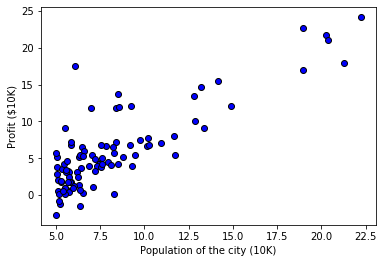

In [6]:
plotData(X, y)

### 2.2 Gradient Descent

In this part, you will fit the linear regression parameters $\theta$ to our dataset using gradient descent.

We have already set up the data for linear regression. In the following cell, we add another dimension to our data to accommodate the $\theta_0$ intercept term. Do NOT execute this cell more than once.

In [7]:
# Add a column of ones to X. The numpy function stack joins arrays along a given axis. 
# The first axis (axis=0) refers to rows (training examples) 
# and second axis (axis=1) refers to columns (features).
X = np.stack([np.ones(m), X], axis=1)

Your next task is to complete the code for the function `computeCost` which computes $J(\theta)$. As you are doing this, remember that the variables $X$ and $y$ are not scalar values. $X$ is a matrix whose rows represent the examples from the training set and $y$ is a vector whose each elemennt represent the value at a given row of $X$.
<a id="computeCost"></a>

In [8]:
def computeCost(X, y, theta):
    """
    Compute cost for linear regression. Computes the cost of using theta as the
    parameter for linear regression to fit the data points in X and y.
    
    Returns
    -------
    J : float
        The value of the regression cost function.
    
    Instructions
    ------------
    Compute the cost of a particular choice of theta. 
    You should set J to the cost.
    """
    
    # initialize some useful values
    m = y.size  # number of training examples
    
    # You need to return the following variables correctly
    J = 0
    
    # ====================== YOUR CODE HERE =====================
    
    h = np.dot(theta, np.transpose(X))
    
    J = 1/(2*m)*np.sum(np.square(h-y))
    
    # ===========================================================
    return J

Once you have completed the function, the next step will run `computeCost` two times using two different initializations of $\theta$. You will see the cost printed to the screen.

In [9]:
J = computeCost(X, y, np.array([[0, 0]]))
print('With theta = [0, 0] \nCost computed = %.2f' % J)
print('Expected cost value (approximately) 32.07\n')


# further testing of the cost function+6
J = computeCost(X, y, np.array([[-1, 2]]))
print('With theta = [-1, 2]\nCost computed = %.2f' % J)
print('Expected cost value (approximately) 54.24')

With theta = [0, 0] 
Cost computed = 32.07
Expected cost value (approximately) 32.07

With theta = [-1, 2]
Cost computed = 54.24
Expected cost value (approximately) 54.24


Next, you will complete a function which implements gradient descent.
The loop structure has been written for you, and you only need to supply the updates to $\theta$ within each iteration. 

In [10]:
def gradientDescent(X, y, theta, alpha, num_iters):
    """
    Performs gradient descent to learn `theta`. Updates theta by taking `num_iters`
    gradient steps with learning rate `alpha`.
    
    Returns
    -------
    theta : array_like
        The learned linear regression parameters. A vector of shape (n+1, ).
    
    J_history : list
        A python list for the values of the cost function after each iteration.
    
    Instructions
    ------------
    Peform a single gradient step on the parameter vector theta.
    """
    # Initialize some useful values
    m = y.shape[0]  # number of training examples
    
    # make a copy of theta, to avoid changing the original array, since numpy arrays
    # are passed by reference to functions
    theta = theta.copy()
    
    J_history = [] # Use a python list to save cost in every iteration
    theta_history = [] #Used to visualize the minimization path later on
    
    for i in range(num_iters):
        # ==================== YOUR CODE HERE =================================
        
        h = np.dot(theta, np.transpose(X))
        
        theta[0] = theta[0] - alpha*(1/m)*np.sum((h-y)*X[:,0])
        theta[1] = theta[1] - alpha*(1/m)*np.sum((h-y)*X[:,1])

        theta_history.append(np.array([theta[0],theta[1]]))
        
        # =====================================================================
        
        # save the cost J in every iteration
        J_history.append(computeCost(X, y, theta))
    
    return theta, J_history, theta_history

After you are finished call the implemented `gradientDescent` function and print the computed $\theta$. We initialize the $\theta$ parameters to 0 and the learning rate $\alpha$ to 0.01. Execute the following cell to check your code.

In [11]:
# initialize fitting parameters
theta = np.zeros(2)

# some gradient descent settings
iterations = 1500
alpha = 0.01

theta, J_history, theta_history = gradientDescent(X ,y, theta, alpha, iterations)

print('Theta found by gradient descent: {:.4f}, {:.4f}'.format(*theta))
print('Expected theta values (approximately): [-3.6303, 1.1664]')

Theta found by gradient descent: -3.6303, 1.1664
Expected theta values (approximately): [-3.6303, 1.1664]


In [12]:
# plot the convergence of the cost function
def plotConvergence(J):

    fig = pyplot.figure()

    pyplot.plot(range(len(J)), J, lw=2)
    pyplot.ylabel('Iterations number')
    pyplot.xlabel('Cost function')

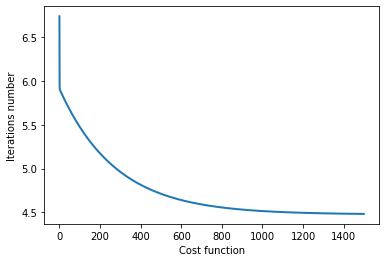

In [13]:
plotConvergence(J_history)

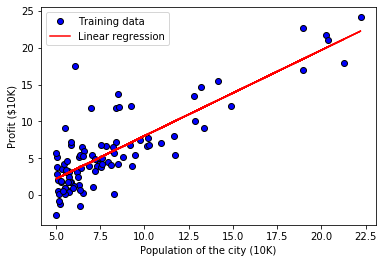

In [14]:
# plot the linear fit
plotData(X[:, 1], y)
pyplot.plot(X[:, 1], np.dot(X, theta), 'r-')
pyplot.legend(['Training data', 'Linear regression']);

### 2.3 Visualizing $J(\theta)$

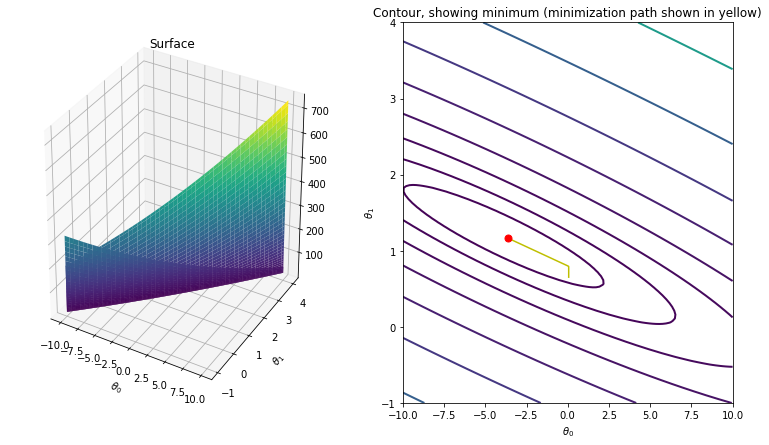

In [15]:
# grid over which we will calculate J
theta0_vals = np.linspace(-10, 10, 100)
theta1_vals = np.linspace(-1, 4, 100)

# initialize J_vals to a matrix of 0's
J_vals = np.zeros((theta0_vals.shape[0], theta1_vals.shape[0]))

# Fill out J_vals
for i, theta0 in enumerate(theta0_vals):
    for j, theta1 in enumerate(theta1_vals):
        J_vals[i, j] = computeCost(X, y, [theta0, theta1])
        
# Because of the way meshgrids work in the surf command, we need to
# transpose J_vals before calling surf, or else the axes will be flipped
J_vals = J_vals.T

# surface plot
fig = pyplot.figure(figsize=(13, 7))
ax = fig.add_subplot(121, projection='3d')
ax.plot_surface(theta0_vals, theta1_vals, J_vals, cmap='viridis')
pyplot.xlabel(r'$\theta_0$')
pyplot.ylabel(r'$\theta_1$')
pyplot.title('Surface')

# contour plot
# Plot J_vals as 15 contours spaced logarithmically between 0.01 and 100
ax = pyplot.subplot(122)
pyplot.contour(theta0_vals, theta1_vals, J_vals, linewidths=2, cmap='viridis', levels=np.logspace(-2, 3, 20))
pyplot.plot([x[0] for x in theta_history],[x[1] for x in theta_history], 'y' , ms=0.5)
pyplot.xlabel(r'$\theta_0$')
pyplot.ylabel(r'$\theta_1$')
pyplot.plot(theta[0], theta[1], 'ro', ms=7, lw=2)
pyplot.title('Contour, showing minimum (minimization path shown in yellow)')

pass

## Optional Exercises


## 3 Linear regression with multiple variables

In this part, you will implement linear regression with multiple variables to predict the prices of houses. Suppose you are selling your house and you want to know what a good market price would be. One way to do this is to first collect information on recent houses sold and make a model of housing prices.

The file `Data/ex1data2.txt` contains a training set of housing prices in Portland, Oregon. The first column is the size of the house (in square feet), the second column is the number of bedrooms, and the third column is the price
of the house. 

<a id="section4"></a>
### 3.1 Feature Normalization

We start by loading and displaying some values from this dataset. By looking at the values, note that house sizes are about 1000 times the number of bedrooms. When features differ by orders of magnitude, first performing feature scaling can make gradient descent converge much more quickly.

In [16]:
# Load data
datafile = 'Data/ex1data2.txt'

# Read into the data file
data = np.loadtxt(os.path.join('Data', 'ex1data2.txt'), delimiter=',')#Read in comma separated data

# Form the usual "X" matrix and "y" vector
X = data[:, :2]
y = data[:, 2]
m = y.size # number of training examples
#Insert the usual column of 1's into the "X" matrix
X = np.insert(X,0,1,axis=1)

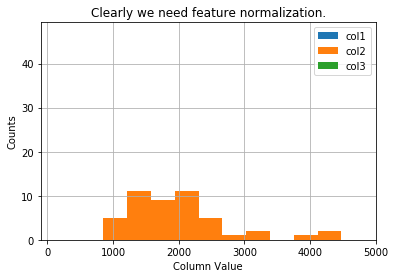

In [17]:
#Quick visualize data
pyplot.grid(True)
pyplot.xlim([-100,5000])
col = pyplot.hist(X[:,0],label = 'col1')
col = pyplot.hist(X[:,1],label = 'col2')
col = pyplot.hist(X[:,2],label = 'col3')
pyplot.title('Clearly we need feature normalization.')
pyplot.xlabel('Column Value')
pyplot.ylabel('Counts')
col = pyplot.legend()

Your task here is to complete the code in `featureNormalize` function:
- Subtract the mean value of each feature from the dataset.
- After subtracting the mean, additionally scale (divide) the feature values by their respective “standard deviations.”

In [18]:
def  featureNormalize(X):
    """
    Normalizes the features in X. returns a normalized version of X where
    the mean value of each feature is 0 and the standard deviation
    is 1. This is often a good preprocessing step to do when working with
    learning algorithms.
    
    Returns
    -------
    X_norm : array_like
        The normalized dataset of shape (m x n).
    
    Instructions
    ------------
    First, for each feature dimension, compute the mean of the feature
    and subtract it from the dataset, storing the mean value in mu. 
    Next, compute the  standard deviation of each feature and divide
    each feature by it's standard deviation, storing the standard deviation 
    in sigma. 
    """
    # You need to set these values correctly
    X_norm = X.copy()
    mu, sigma = [], []

    # =========================== YOUR CODE HERE =====================
    
    for icol in range(1,3):
        mu.append(np.mean(X_norm[:,icol]))
        sigma.append(np.std(X_norm[:,icol]))

        #Faster to not recompute the mean and std again, just used stored values
        X_norm[:,icol] = (X_norm[:,icol] - mu[icol-1])/sigma[icol-1]
    
    # ================================================================
    return X_norm, mu, sigma

In [19]:
# call featureNormalize on the loaded data
X_norm, mu, sigma = featureNormalize(X)

print('Computed mean:', mu)
print('Computed standard deviation:', sigma)

Computed mean: [2000.6808510638298, 3.1702127659574466]
Computed standard deviation: [786.2026187430467, 0.7528428090618781]


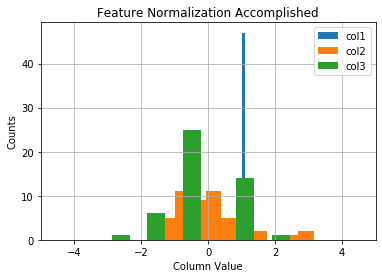

In [20]:
#Quick visualize the feature-normalized data
pyplot.grid(True)
pyplot.xlim([-5,5])
col = pyplot.hist(X_norm[:,0],label = 'col1')
col = pyplot.hist(X_norm[:,1],label = 'col2')
col = pyplot.hist(X_norm[:,2],label = 'col3')
pyplot.title('Feature Normalization Accomplished')
pyplot.xlabel('Column Value')
pyplot.ylabel('Counts')
col = pyplot.legend()

<a id="section5"></a>
### 3.2 Gradient Descent

Previously, you implemented gradient descent on a univariate regression problem. The only difference now is that there is one more feature in the matrix $X$. The hypothesis function and the batch gradient descent update
rule remain unchanged. 

You should complete the code for the functions `computeCostMulti` and `gradientDescentMulti` to implement the cost function and gradient descent for linear regression with multiple variables.

In [21]:
def computeCostMulti(X, y, theta):
    """
    Compute cost for linear regression with multiple variables.
    Computes the cost of using theta as the parameter for linear regression to fit the data points in X and y.
    
    Returns
    -------
    J : float
        The value of the cost function. 
    
    Instructions
    ------------
    Compute the cost of a particular choice of theta. You should set J to the cost.
    """
    # Initialize some useful values
    m = y.shape[0] # number of training examples
    
    # You need to return the following variable correctly
    J = 0
    # ======================= YOUR CODE HERE ===========================
    h = np.dot(theta,np.transpose(X)) #theta vector fila 
    J = 1/(2*m)*np.sum(np.square(h-y))
    
    # ==================================================================
    return J

In [22]:
def gradientDescentMulti(X, y, theta, alpha, num_iters):
    """
    Performs gradient descent to learn theta.
    Updates theta by taking num_iters gradient steps with learning rate alpha.

    Instructions
    ------------
    Peform a single gradient step on the parameter vector theta.

    While debugging, it can be useful to print out the values of 
    the cost function (computeCost) and gradient here.
    """
    # Initialize some useful values
    m = y.shape[0] # number of training examples
    
    # make a copy of theta, which will be updated by gradient descent
    theta = theta.copy()
    
    J_history = []
    
    for i in range(num_iters):
        # ======================= YOUR CODE HERE ==========================
        h = np.dot(theta,np.transpose(X)) 
        for j in range(0, X.shape[1]):
            theta[j] = theta[j] - alpha*(1/m)*np.sum((h-y)*X[:,j])
            
        # =====================================================================
        
        # save the cost J in every iteration
        J_history.append(computeCostMulti(X, y, theta))

    
    return theta, J_history

In [23]:
#Actually run gradient descent to get the best-fit theta values

#theta = np.zeros((X.shape[0],1)) #(1,47)
theta = np.zeros(3)
alpha = 0.05
iterations = 1500

theta, J_history = gradientDescentMulti(X_norm, y, theta, alpha, iterations)

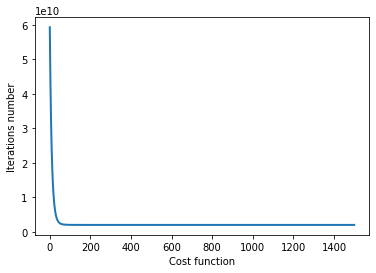

In [24]:
plotConvergence(J_history)

In [25]:
# Estimate the price of a 1650 sq-ft, 3 br house
# ======================= YOUR CODE HERE ===========================
# Recall that the first column of X is all-ones. 
# Thus, it does not need to be normalized.

price = 0   # You should change this
 
X_house = np.array([1.,1650,3.])

# Normalization
for icol in range(1,3):
    X_house[icol] = (X_house[icol] - mu[icol-1])/sigma[icol-1]

# Insert in the hipotesis
price = np.dot(theta,np.transpose(X_house))

# ===================================================================

# Display the gradient descent's result
print('theta computed from gradient descent: {:s}'.format(str(theta)))

print('Predicted price of a 1650 sq-ft, 3 br house (using gradient descent): ${:.0f}'.format(price))

theta computed from gradient descent: [340412.65957447 109447.79646964  -6578.35485416]
Predicted price of a 1650 sq-ft, 3 br house (using gradient descent): $293081


<a id="section7"></a>
### 3.3 Normal Equations

In the lecture videos, you learned that the closed-form solution to linear regression is

$$ \theta = \left( X^T X\right)^{-1} X^T\vec{y}$$

Using this formula does not require any feature scaling, and you will get an exact solution in one calculation: there is no “loop until convergence” like in gradient descent. 

In [26]:
# Load data
data = np.loadtxt(os.path.join('Data', 'ex1data2.txt'), delimiter=',')
X = data[:, :2]
y = data[:, 2]
m = y.size
X = np.concatenate([np.ones((m, 1)), X], axis=1)

Complete the code for the function `normalEqn` below to use the formula above to calculate $\theta$. 

<a id="normalEqn"></a>

In [27]:
def normalEqn(X, y):
    """
    Computes the closed-form solution to linear regression using the normal equations.
    
    Instructions
    ------------
    Complete the code to compute the closed form solution to linear
    regression and put the result in theta.
    
    """
    theta = np.zeros(X.shape[1])
    
    # ===================== YOUR CODE HERE ============================
    theta = np.dot(np.linalg.pinv(np.dot(np.transpose(X),X)),np.dot(np.transpose(X),y))
    
    # =================================================================
    return theta

In [28]:
# Calculate the parameters from the normal equation
theta = normalEqn(X, y);

# Display normal equation's result
print('Theta computed from the normal equations: {:s}'.format(str(theta)));

# Estimate the price of a 1650 sq-ft, 3 br house
# ====================== YOUR CODE HERE ======================

price = 0 # You should change this

X_house = np.array([1.,1650,3.])

# Insert in the hipotesis
price = np.dot(theta,np.transpose(X_house))

# ============================================================

print('Predicted price of a 1650 sq-ft, 3 br house (using normal equations): ${:.0f}'.format(price))

Theta computed from the normal equations: [89597.90954361   139.21067402 -8738.01911255]
Predicted price of a 1650 sq-ft, 3 br house (using normal equations): $293081
